### The dataset I am using here for This Dataset consists of reviews by customers on boAt Rockerz 400 sentiment analysis is downloaded from Kaggle. I am going to start this task by importing the necessary Python libraries and the dataset:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
data=pd.read_csv(r"C:\Users\91708\Desktop\Datasets\flipkart_reviews.csv")

In [3]:
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [4]:
data.shape

(9976, 2)

### This dataset contains only two columns and nine thousand nine hundred seventy six rows. Let’s have a look at whether any of these columns contains missing values or not:

In [5]:
data.isnull().sum()

review    0
rating    0
dtype: int64

### So the dataset does not have any null values. As this is the task of sentiment analysis of Flipkart reviews, I will clean and prepare the column containing reviews before heading to sentiment analysis:

In [10]:
import nltk
import re
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

In [12]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["review"] = data["review"].apply(clean)

### The rating column of the data contains the ratings given by every reviewer. So let’s have a look at how most of the people rate the product they buy from Flipkart:

In [19]:
ratings = data["rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(data, 
             values=quantity, 
             names=numbers)
figure.show()

So 57.4% of the reviewers have given 5 out of 5 ratings to the product they buy from Flipkart. Now let’s have a look at the kind of reviews people leave. For this, I will use a word cloud to visualize the most used words in the reviews column:

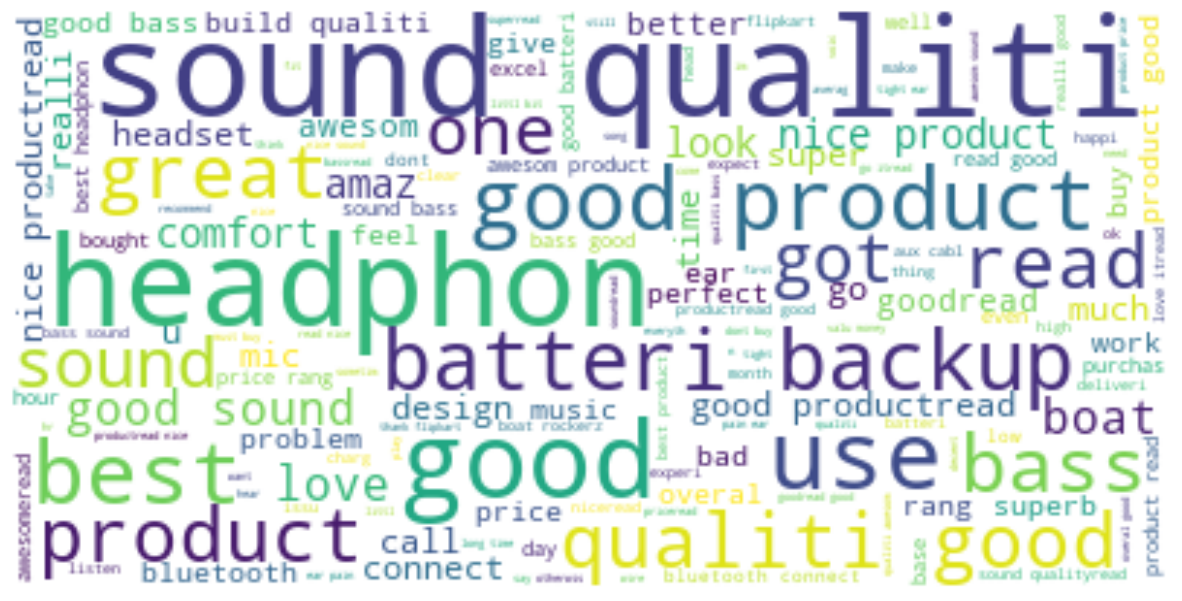

In [23]:
text = " ".join(i for i in data.review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### Now I will analyze the sentiments of Flipkart reviews by adding three columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the reviews:

In [25]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["review"]]
data = data[["review", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91708\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                              review  Positive  Negative  \
0  nice produt like design lot  easi carri   look...     0.431     0.000   
1  awesom soundveri pretti see nd sound qualiti g...     0.471     0.000   
2  awesom sound qualiti pros  hrs batteri life in...     0.194     0.000   
3  think good product per qualiti also design qui...     0.393     0.049   
4  awesom bass sound qualiti good bettari long li...     0.260     0.000   

   Neutral  
0    0.569  
1    0.529  
2    0.806  
3    0.558  
4    0.740  


### Now let’s see how most of the reviewers think about the product and services of Flipkart:

In [29]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 👍 ")
    elif (b>a) and (b>c):
        print("Negative 👎 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


### So most of the reviews are neutral. Let’s have a look at the total of Positive, Negative, and Neutral sentiment scores to find a conclusion about Flipkart reviews:So most of the reviews are neutral. Let’s have a look at the total of Positive, Negative, and Neutral sentiment scores to find a conclusion about Flipkart reviews:

In [28]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  3127.3110000000815
Negative:  374.17000000000013
Neutral:  6474.495999999996


## So, most people give Neutral reviews, and a small proportion of people give Negative reviews. So we can say that people are satisfied with boAt Rockerz 400 (Flipkart product) and services